In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt;
import scipy.stats as stats
import statsmodels.formula.api as smf
import numpy as np
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
os.chdir("/Users/hannahkaufman/bmi312/bmi 312/Term Project- bmi312/");
os.getcwd()

'/Users/hannahkaufman/bmi312/bmi 312/Term Project- bmi312'

In [4]:
survey = 'survey.csv'
data = pd.read_csv(survey);
data.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [5]:
# Information about our dataset
print('Number of samples before cleaning: ', data.shape[0], '\nNumber of attributes before cleaning: ', data.shape[1])

# Data cleaning:
# 1. Since one focus of our question is geographic location, which state a person is from, we will remove
# data samples that do not live in the United States.

# Filter all rows for which the sample's geographic is not the United States
indexNames = data[data['Country'] != 'United States'].index

# Delete these row indexes
data.drop(indexNames, inplace = True)

# Print it's shape
print('Number of samples after filtering location: ', data.shape[0], '\nNumber of attributes after filtering location: ', data.shape[1])

# The different genders of our data samples
print('\n\nBefore Filtering for Gender...\n\n', data.groupby('Gender').size(), '\n') 

# Replacing spelling
gender_recode = {'Female': 'F', 'Femake': 'F',
'Female (cis)': 'F', 'Woman' : 'F', 'cis-female/femme': 'F',
'f': 'F', 'femail': 'F', 'female': 'F', 
'woman': 'F', 'Cis Male': 'M', 'Cis Man': 'M', 'Mail': 'M', 
'Make': 'M', 'Mal': 'M', 'Male (CIS)': 'M', 'Man': 'M', 
'Malr': 'M', 'Male-ish' : 'M', 'Guy (-ish) ^_^': 'M', 'cis male': 'M',
'm' : 'M', 'maile' : 'M', 'male':'M', 'msle' : 'M', 'ostensibly male, unsure what that really means' : 'M',
'something kinda male?' : 'M', 'Agender' : 'I', 'All': 'I', 'Androgyne': "I",
'Enby' : 'I', 'Female (trans)' : 'I', 'Genderqueer' : 'I',
'Trans woman': 'I', 'fluid' : 'I', 'non-binary' : 'I', 'queer' : 'I',
'queer/she/they' : 'I'}

data['Gender'] = data.Gender.map(gender_recode)
#data['Gender'] = data['Gender'].replace({'Cis Female': 'Female','F':'Female','Femake':'Female', 'Female (cis)':'Female', 'Woman':'Female', 'cis-female/femme':'Female', 'f':'Female', 'femail':'Female','female':'Female', 'woman':'Female'})
#data.loc[['Cis Female','F', 'Femake', 'Female (cis)', 'Woman', 'cis-female/femme', 'f', 'femail', 'female', 'woman']] = 'Female'
#misspelled_female = {
#    'Cis Female': 'Female','F':'Female','Femake':'Female', 'Female (cis)':'Female', 'Woman':'Female', 'cis-female/femme':'Female', 'f':'Female', 'femail':'Female','female':'Female', 'woman':'Female'
#}
#data['Gender'].replace(misspelled_female)
#misspelled_male = {
#   'Cis Male': 'Male','Cis Man': 'Male', 'M': 'Male', 'Mail':'Male', 'Make':'Male', 'Mal':'Male', 'Male (CIS)':'Male', 'Man':'Male', 'Malr': 'Male', 'Male-ish': 'Male', 'Guy (-ish) ^_^': 'Male', 'cis male': 'Male', 'm': 'Male', 'maile': 'Male', 'male':'Male', 'msle':'Male', 'ostensibly male, unsure what that really means':'Male', 'something kinda male?':'Male'
#}
#inclusive_gender = {
#    'Agender':'LGBTQ+','All':'LGBTQ+','Androgyne':'LGBTQ+','Enby':'LGBTQ+','Female (trans)':'LGBTQ+','Genderqueer':'LGBTQ+','Trans woman':'LGBTQ+','fluid':'LGBTQ+','non-binary':'LGBTQ+','queer':'LGBTQ+','queer/she/they':'LGBTQ+'
#}
#data['Gender'].replace(misspelled_male)
#data['Gender'].replace(misspelled_female)
#data['Gender'].replace(inclusive_gender)

data = data[data["Gender"].str.contains("p") == False]
data = data[data["Gender"].str.contains("Nah") == False]

print('\n\nAfter Cleaning...\n', data.groupby('Gender').size(), '\n') 

print('\n\nBefore Categorizing by Geographic Region...\n\n', data.groupby('state').size(), '\n') 

state_recode = {'AL': 'S', 'CA': 'W',
'CO': 'W', 'DC' : 'S', 'FL': 'S',
'GA': 'S', 'IL': 'MW', 'IN': 'MW', 'NM' : 'W', 'NV' : 'W',
'KS': 'MW', 'KY': 'S', 'MA': 'NE', 'MD': 'S', 
'MI': 'MW', 'MN': 'MW', 'MO': 'MW', 'NC': 'S', 
'NJ': 'NE', 'NY' : 'NE', 'OH': 'MW', 'OK': 'S',
'OR' : 'W', 'PA' : 'NE', 'SD':'MW', 'TN' : 'S', 'TX' : 'S',
'UT' : 'W', 'VA' : 'S', 'VT': 'NE', 'WA': "W",
'AZ' : 'W', 'CT' : 'NE', 'LA' : 'S',
'MS': 'S', 'WI' : 'MW'}

data = data[data["state"].str.contains("nan") == False]
data['state'] = data.state.map(state_recode)
print('\n\nAfter Categorizing...\n', data.groupby('state').size(), '\n') 

#1259 Samples
#54.4726% of which sought treatment, 45.5274% who did not
#143 are female, 121 are male, and 6 are LGBTQ+
# 

Number of samples before cleaning:  1259 
Number of attributes before cleaning:  27
Number of samples after filtering location:  751 
Number of attributes after filtering location:  27


Before Filtering for Gender...

 Gender
Cis Female            1
Cis Male              2
F                    34
Femake                1
Female               82
Female                2
Female (cis)          1
Female (trans)        2
Genderqueer           1
M                    92
Mail                  1
Make                  4
Male                348
Male                  1
Male (CIS)            1
Male-ish              1
Man                   1
Nah                   1
Trans woman           1
Trans-female          1
Woman                 2
cis male              1
cis-female/femme      1
f                    11
femail                1
female               43
m                    18
maile                 1
male                 90
msle                  1
non-binary            1
p                     1
queer

family_history
No     0.509363
Yes    0.490637
dtype: float64 



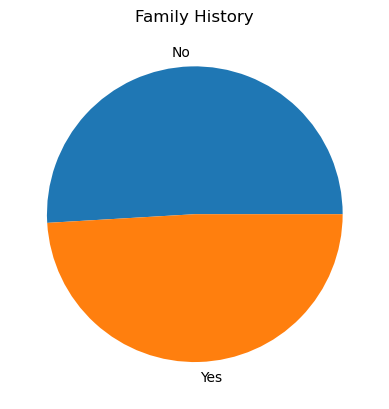

In [13]:
fig = plt.subplots(nrows=1, ncols=1);
plt.subplots_adjust(wspace=1);
by_family_history = data.groupby('family_history').size()
print(by_family_history/by_family_history.sum(), '\n') 
by_family_history.plot(kind='pie', title='Family History') 
axes.yaxis.label.set_visible(True)

treatment
No     0.397004
Yes    0.602996
dtype: float64 



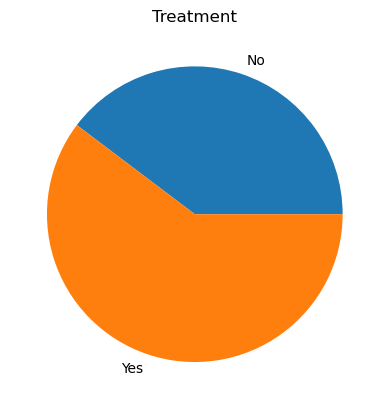

In [12]:
fig, axes = plt.subplots(nrows=1, ncols=1);
plt.subplots_adjust(wspace=1);
by_treatment = data.groupby('treatment').size()
print(by_treatment/by_treatment.sum(), '\n') 
by_treatment.plot(kind='pie', title='Treatment') 
axes.yaxis.label.set_visible(True)

In [14]:
data

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,F,United States,MW,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
6,2014-08-27 11:31:50,35,F,United States,MW,NaN,Yes,Yes,Sometimes,1-5,...,Somewhat difficult,Maybe,Maybe,Some of them,No,No,No,Don't know,No,NaN
8,2014-08-27 11:32:39,42,F,United States,MW,NaN,Yes,Yes,Sometimes,100-500,...,Very difficult,Maybe,No,Yes,Yes,No,Maybe,No,No,NaN
12,2014-08-27 11:33:23,42,F,United States,W,NaN,Yes,Yes,Sometimes,26-100,...,Somewhat difficult,Yes,Yes,Yes,Yes,Maybe,Maybe,No,Yes,NaN
15,2014-08-27 11:34:00,29,F,United States,MW,NaN,Yes,Yes,Rarely,26-100,...,Somewhat easy,No,No,Yes,Some of them,Maybe,Maybe,Don't know,No,I have chronic low-level neurological issues t...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1243,2015-05-05 14:22:18,43,F,United States,S,No,Yes,Yes,Rarely,More than 1000,...,Don't know,No,No,Some of them,Yes,No,No,Don't know,No,NaN
1248,2015-06-25 12:24:31,41,F,United States,W,No,Yes,Yes,Sometimes,26-100,...,Don't know,Yes,Maybe,No,No,No,No,Don't know,No,NaN
1252,2015-08-20 16:52:09,29,M,United States,S,No,Yes,Yes,Sometimes,100-500,...,Don't know,Yes,No,Some of them,No,No,Maybe,No,No,NaN
1256,2015-11-07 12:36:58,34,M,United States,W,No,Yes,Yes,Sometimes,More than 1000,...,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,NaN


In [15]:
print(data.groupby(['treatment', 'family_history']).size(), '\n\n')
print(data.groupby(['treatment', 'Gender']).size(), '\n\n')
print(data.groupby(['treatment', 'state']).size(), '\n\n')

treatment  family_history
No         No                 76
           Yes                30
Yes        No                 60
           Yes               101
dtype: int64 


treatment  Gender
No         F         42
           I          1
           M         63
Yes        F         99
           I          5
           M         57
dtype: int64 


treatment  state
No         MW       14
           NE       17
           S        36
           W        39
Yes        MW       33
           NE       31
           S        31
           W        66
dtype: int64 




In [17]:
data_crosstab = pd.crosstab(data['treatment'],
                            data['Gender'],
                           margins=True, margins_name="Total")
alpha = 0.05

chi_square = 0
rows = data['treatment'].unique()
columns = data['Gender'].unique()
# print(rows)
# print(columns)
for i in columns:
    for j in rows:
        O = data_crosstab[i][j]
        E = data_crosstab[i]['Total'] * data_crosstab['Total'][j] / data_crosstab['Total']['Total']
        chi_square += (O-E)**2/E

#Pass the cross tab into the contingency table

print("Approach 1: The p-value approach to hypothesis testing in the decision rule")
p_value = 1 - stats.chi2.cdf(chi_square, (len(rows)-1)*(len(columns)-1))
conclusion = "Failed to reject the null hypothesis."
if p_value <= alpha:
    conclusion = "Null Hypothesis is rejected."

print("chisquare-score is:", chi_square, " and p value is:", p_value)
print(conclusion)

print("\n--------------------------------------------------------------------------------------")
print("Approach 2: The critical value approach to hypothesis testing in the decision rule")
critical_value = stats.chi2.ppf(1-alpha, (len(rows)-1)*(len(columns)-1))
conclusion = "Failed to reject the null hypothesis."
if chi_square > critical_value:
    conclusion = "Null Hypothesis is rejected."
    
print("chisquare-score is:", chi_square, " and critical value is:", critical_value)
print(conclusion)

data_crosstab = pd.crosstab(data['treatment'],
                            data['Gender'])

# Dr. Liu's code to ensure our results are correct
# chi2 = stats.chi2_contingency(data_crosstab)
# print('\n\n', chi2)

Approach 1: The p-value approach to hypothesis testing in the decision rule
chisquare-score is: 15.330134103892025  and p value is: 0.0004689253118689285
Null Hypothesis is rejected.

--------------------------------------------------------------------------------------
Approach 2: The critical value approach to hypothesis testing in the decision rule
chisquare-score is: 15.330134103892025  and critical value is: 5.991464547107979
Null Hypothesis is rejected.


In [18]:
data_crosstab = pd.crosstab(data['treatment'],
                            data['family_history'],
                           margins=True, margins_name="Total")
alpha = 0.05

chi_square = 0
rows = data['treatment'].unique()
columns = data['family_history'].unique()

for i in columns:
    for j in rows:
        O = data_crosstab[i][j]
        E = data_crosstab[i]['Total'] * data_crosstab['Total'][j] / data_crosstab['Total']['Total']
        chi_square += (O-E)**2/E

print("Approach 1: The p-value approach to hypothesis testing in the decision rule")
p_value = 1 - stats.chi2.cdf(chi_square, (len(rows)-1)*(len(columns)-1))
conclusion = "Failed to reject the null hypothesis."
if p_value <= alpha:
    conclusion = "Null Hypothesis is rejected."

print("chisquare-score is:", chi_square, " and p value is:", p_value)
print(conclusion)

print("\n--------------------------------------------------------------------------------------")
print("Approach 2: The critical value approach to hypothesis testing in the decision rule")
critical_value = stats.chi2.ppf(1-alpha, (len(rows)-1)*(len(columns)-1))
conclusion = "Failed to reject the null hypothesis."
if chi_square > critical_value:
    conclusion = "Null Hypothesis is rejected."
    
print("chisquare-score is:", chi_square, " and critical value is:", critical_value)
print(conclusion)

# Dr. Liu's code to ensure our results are correct
# chi2 = stats.chi2_contingency(data_crosstab)
# print('\n\n', chi2)

Approach 1: The p-value approach to hypothesis testing in the decision rule
chisquare-score is: 30.320257847830376  and p value is: 3.66280423769183e-08
Null Hypothesis is rejected.

--------------------------------------------------------------------------------------
Approach 2: The critical value approach to hypothesis testing in the decision rule
chisquare-score is: 30.320257847830376  and critical value is: 3.841458820694124
Null Hypothesis is rejected.


In [19]:
data_crosstab = pd.crosstab(data['treatment'],
                            data['state'],
                           margins=True, margins_name="Total")
alpha = 0.05

chi_square = 0
rows = data['treatment'].unique()
columns = data['state'].unique()

for i in columns:
    for j in rows:
        O = data_crosstab[i][j]
        E = data_crosstab[i]['Total'] * data_crosstab['Total'][j] / data_crosstab['Total']['Total']
        chi_square += (O-E)**2/E

print("Approach 1: The p-value approach to hypothesis testing in the decision rule")
p_value = 1 - stats.chi2.cdf(chi_square, (len(rows)-1)*(len(columns)-1))
conclusion = "Failed to reject the null hypothesis."
if p_value <= alpha:
    conclusion = "Null Hypothesis is rejected."

print("chisquare-score is:", chi_square, " and p value is:", p_value)
print(conclusion)

print("\n--------------------------------------------------------------------------------------")
print("Approach 2: The critical value approach to hypothesis testing in the decision rule")
critical_value = stats.chi2.ppf(1-alpha, (len(rows)-1)*(len(columns)-1))
conclusion = "Failed to reject the null hypothesis."
if chi_square > critical_value:
    conclusion = "Null Hypothesis is rejected."
    
print("chisquare-score is:", chi_square, " and critical value is:", critical_value)
print(conclusion)

# Dr. Liu's code to ensure our results are correct
# chi2 = stats.chi2_contingency(data_crosstab)
# print('\n\n', chi2)

Approach 1: The p-value approach to hypothesis testing in the decision rule
chisquare-score is: 8.09404162488036  and p value is: 0.04410760972883365
Null Hypothesis is rejected.

--------------------------------------------------------------------------------------
Approach 2: The critical value approach to hypothesis testing in the decision rule
chisquare-score is: 8.09404162488036  and critical value is: 7.814727903251179
Null Hypothesis is rejected.


In [20]:
#family history & treatment to 0 and 1s
history_recode = {'No' : '0', 'Yes': '1'}
data['family_history'] = data.family_history.map(history_recode)
treatment_recode = {'No' : '0', 'Yes': '1'}
data['treatment'] = data.treatment.map(treatment_recode)
gender_recode = {'F' : '0', 'M': '1', 'I' : '0'}
data['Gender'] = data.Gender.map(gender_recode)

#data = data[data['treatment'].str.contains("nan") == False]
#data = data[data["Gender"].str.contains("nan") == False]
#data = data[data["family_history"].str.contains("nan") == False]

In [21]:
data['treatment'] = pd.to_numeric(data['treatment'])
data['Gender'] = pd.to_numeric(data['Gender'])
data['family_history'] = pd.to_numeric(data['family_history'])
model = smf.logit('treatment ~ Gender + family_history', data=data).fit();
model.summary()

Optimization terminated successfully.
         Current function value: 0.592700
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              treatment   No. Observations:                  267
Model:                          Logit   Df Residuals:                      264
Method:                           MLE   Df Model:                            2
Date:                Tue, 23 Jul 2024   Pseudo R-squ.:                  0.1177
Time:                        19:57:18   Log-Likelihood:                -158.25
converged:                       True   LL-Null:                       -179.36
Covariance Type:            nonrobust   LLR p-value:                 6.766e-10
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.2141      0.221      0.968      0.333      -0.220       0.648
Gender            -0.8978      0.272     -3.305      0.001      -1.430      -0.365
family_history     1.3936      0.276      5.050      0.000       0.853       1.934
==================================================================================
"""

In [22]:
#define the predictor variables and the response variable
X = data[['Gender', 'family_history']]
y = data['treatment']

#split the dataset into training (70%) and testing (30%) sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0) 

#instantiate the model
log_regression = LogisticRegression()

#fit the model using the training data
log_regression.fit(X_train,y_train)

LogisticRegression()

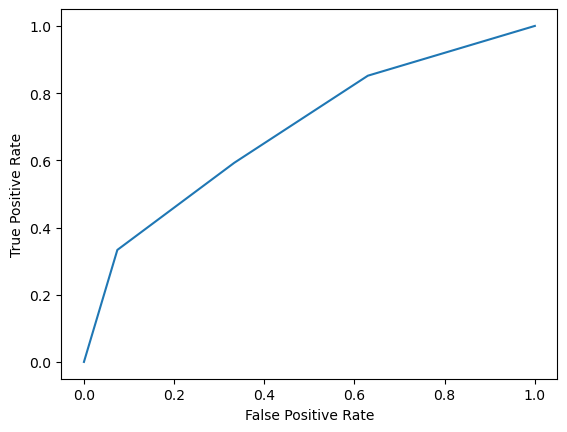

In [23]:
#y_true = np.array([0, 1, 0, 0, 1, 1, 1, 1, 1])
#define metrics
y_pred_proba = log_regression.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

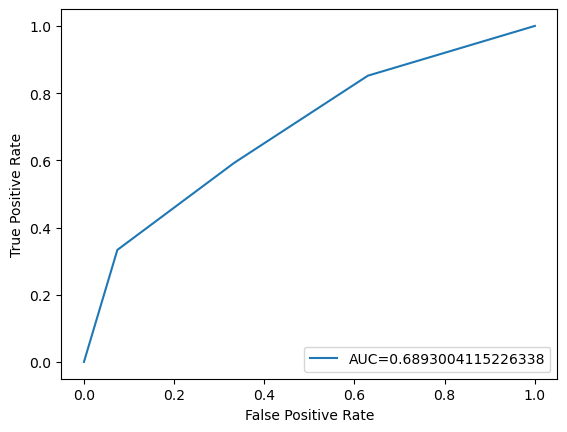

In [24]:
#define metrics
y_pred_proba = log_regression.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()